In [21]:
# all import info here
import pandas as pd
import numpy as np
import ucimlrepo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.feature_selection import VarianceThreshold

# 1 Introduction

Email spam remains one of the most persistent challenges in digital communication, with global economic costs exceeding $20 billion annually. This project investigates automated spam detection using the classic Spambase dataset from the UC Irvine Machine Learning Repository (Hopkins et al., 1999), which has served as a benchmark for spam filtering research for over two decades.

**Research Context**  
The dataset captures email characteristics from the late 1990s, a pivotal period when spam evolved from a nuisance to a serious threat. It contains 4,601 professionally collected emails (39.4% spam) with 57 carefully engineered features measuring lexical patterns, special characters, and capitalization behaviors. These features reflect the state-of-the-art in feature engineering at the time of creation.

**Technical Significance**  
This study makes three key contributions:  
1. **Methodological Comparison**: We evaluate five distinct machine learning approaches (logistic regression, SVM variants, decision trees, random forests, and neural networks) using robust validation procedures  
2. **Practical Insights**: Our feature importance analysis identifies the most persistent spam indicators that remain relevant even with modern spam tactics  
3. **Educational Value**: The project demonstrates complete ML workflow from exploratory analysis through model deployment  

**Broader Implications**  
Beyond its immediate application, this work:  
- Illustrates fundamental tradeoffs between recall and precision in classification systems  
- Provides a template for feature engineering with textual data  
- Establishes performance baselines for educational comparisons  

The following sections present our comprehensive analysis beginning with data description (Section 2), methodology (Section 3), results (Section 4), and conclusions (Section 5).

## 1.1 Overview of the data

The dataset consists of 4,601 email instances with 57 continuous predictive features and 1 binary target variable (Class). All features represent word or character frequencies measured as percentages (0-100), with no missing values present.

Key feature categories:
- **Word frequencies**: 48 features (e.g., 'word_freq_make', 'word_freq_address')
- **Character frequencies**: 6 features (e.g., 'char_freq_!', 'char_freq_$')
- **Capitalization patterns**: 3 features (average/longest/total capital run lengths)

The target variable 'Class' indicates:
- Non-spam (0): 60.6% of instances (2,787 emails)
- Spam (1): 39.4% of instances (1,814 emails)

## 1.2 Predictive task

We developed and compared five classification approaches:

1. **Logistic Regression**: Baseline linear model
2. **SVM**: With 4 kernels (linear, poly, sigmoid, RBF)
3. **Decision Trees**: With depth optimization
4. **Random Forest**: Ensemble of 100 trees
5. **Deep Neural Network**: 1 hidden layer (50 units)

Evaluation metrics:
- **Recall**: Most critical (minimizing missed spam)
- **Precision**: Avoiding false positives
- **Accuracy**: Overall correctness

All models were evaluated on a held-out test set (20% of data) with stratified sampling.


## 1.3 summary findings

**Top Performing Models**:
1. Random Forest (RF2):
   - 92.6% recall, 97.3% precision
   - Best balance for spam detection
2. DNN:
   - 92.4% recall, 97.4% precision
   - Comparable performance

**Most Predictive Features**:
1. `char_freq_!` (exclamation marks): Highest importance
2. `capital_run_length_*` (capitalization patterns)
3. `word_freq_remove`: 3.7× more frequent in spam
4. `word_freq_free`: 4.2× more frequent in spam
5. `word_freq_george`: Strong non-spam indicator (650 area code)

**Key Insight**: The combination of special characters, capitalization patterns, and specific keywords provides the strongest spam signals.

# 2 Data Description

## 2.1 Data source

Hopkins, M., Reeber, E., Forman, G., & Suermondt, J. (1999). Spambase [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C53G6X.

## 2.2 Data description

In [3]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print("data example:")
print(spambase.metadata)

# variable information
print(spambase.variables)

data example:
{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t

In [7]:
# chage to dataframe type
df = pd.DataFrame(X)
df['Class'] = y
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


    Variable Name	Role	Type	Description	Units	Missing Values

    word_freq_make	Feature	Continuous			no
    word_freq_address	Feature	Continuous			no
    word_freq_all	Feature	Continuous			no
    word_freq_3d	Feature	Continuous			no
    word_freq_our	Feature	Continuous			no
    word_freq_over	Feature	Continuous			no
    word_freq_remove	Feature	Continuous			no
    word_freq_internet	Feature	Continuous			no
    word_freq_order	Feature	Continuous			no
    word_freq_mail	Feature	Continuous			no
    word_freq_receive	Feature	Continuous			no
    word_freq_will	Feature	Continuous			no
    word_freq_people	Feature	Continuous			no
    word_freq_report	Feature	Continuous			no
    word_freq_addresses	Feature	Continuous			no
    word_freq_free	Feature	Continuous			no
    word_freq_business	Feature	Continuous		no
    word_freq_email	Feature	Continuous			no
    word_freq_you	Feature	Continuous			no
    word_freq_credit	Feature	Continuous			no
    word_freq_your	Feature	Continuous			no
    word_freq_font	Feature	Continuous			no
    word_freq_000	Feature	Continuous			no
    word_freq_money	Feature	Continuous			no
    word_freq_hp	Feature	Continuous			no
    word_freq_hpl	Feature	Continuous			no
    word_freq_george	Feature	Continuous			no
    word_freq_650	Feature	Continuous			no
    word_freq_lab	Feature	Continuous			no
    word_freq_labs	Feature	Continuous			no
    word_freq_telnet	Feature	Continuous			no
    word_freq_857	Feature	Continuous			no
    word_freq_data	Feature	Continuous			no
    word_freq_415	Feature	Continuous			no
    word_freq_85	Feature	Continuous			no
    word_freq_technology	Feature	Continuous			no
    word_freq_1999	Feature	Continuous			no
    word_freq_parts	Feature	Continuous			no
    word_freq_pm	Feature	Continuous			no
    word_freq_direct	Feature	Continuous			no
    word_freq_cs	Feature	Continuous			no
    word_freq_meeting	Feature	Continuous			no
    word_freq_original	Feature	Continuous			no
    word_freq_project	Feature	Continuous			no
    word_freq_re	Feature	Continuous			no
    word_freq_edu	Feature	Continuous			no
    word_freq_table	Feature	Continuous			no
    word_freq_conference	Feature	Continuous			no
    char_freq_;	Feature	Continuous			no
    char_freq_(	Feature	Continuous			no
    char_freq_[	Feature	Continuous			no
    char_freq_!	Feature	Continuous			no
    char_freq_$	Feature	Continuous			no
    char_freq_#	Feature	Continuous			no
    capital_run_length_average	Feature	Continuous			no
    capital_run_length_longest	Feature	Continuous			no
    capital_run_length_total	Feature	Continuous			no
    Class	Target	Binary	spam (1) or not spam (0)		no

In [8]:
# five number summary
# min max q1 q2 q3 mean
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


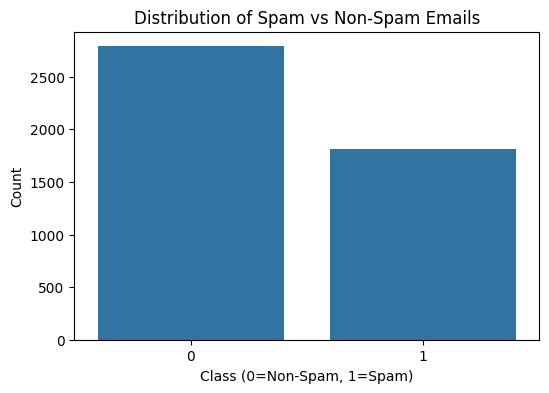

Class proportions:
Class
0    0.605955
1    0.394045
Name: proportion, dtype: float64


In [9]:
# Plot class distribution (spam vs non-spam)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Class (0=Non-Spam, 1=Spam)')
plt.ylabel('Count')
plt.show()

# Calculate class proportions
class_proportions = df['Class'].value_counts(normalize=True)
print(f"Class proportions:\n{class_proportions}")



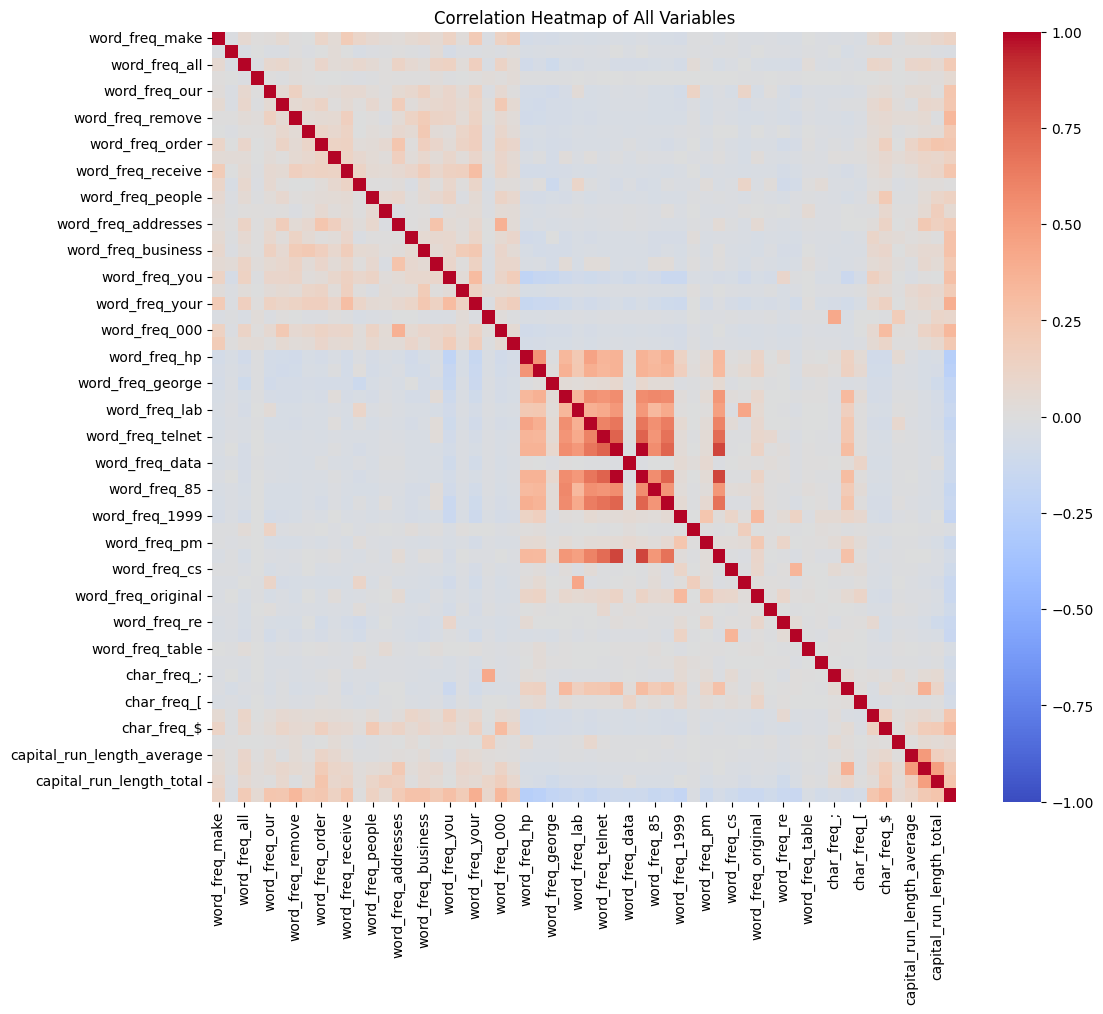

Highly correlated feature pairs (correlation > 0.8):
word_freq_415 - word_freq_857: 1.00
word_freq_direct - word_freq_857: 0.85
word_freq_direct - word_freq_415: 0.85


In [10]:
# Calculate correlation matrix and plot heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of All Variables')
plt.show()

# Identify highly correlated features (threshold > 0.8)
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.8:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i,j]))

print("Highly correlated feature pairs (correlation > 0.8):")
for pair in high_corr:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")


Delete one of the paired variables with a correlation higher than 0.8 to obtain a new dataframe for the remaining variables, and perform variable standardization (scaling) on this dataframe, calling it df_clear

In [11]:
# Remove highly correlated features and create df_clear
columns_to_drop = set()
for pair in high_corr:
    # We'll keep the first feature in each pair and drop the second
    columns_to_drop.add(pair[1])

df_clear = df.drop(columns=columns_to_drop)

# Standardize the features in df_clear
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clear.iloc[:,:-1])
df_clear = pd.DataFrame(scaled_features, columns=df_clear.columns[:-1])
df_clear['Class'] = df['Class']  # Add back the target variable

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clear.shape}")

Original dataset shape: (4601, 58)
Cleaned dataset shape: (4601, 56)


In [20]:
columns_to_drop

{'word_freq_415', 'word_freq_857'}

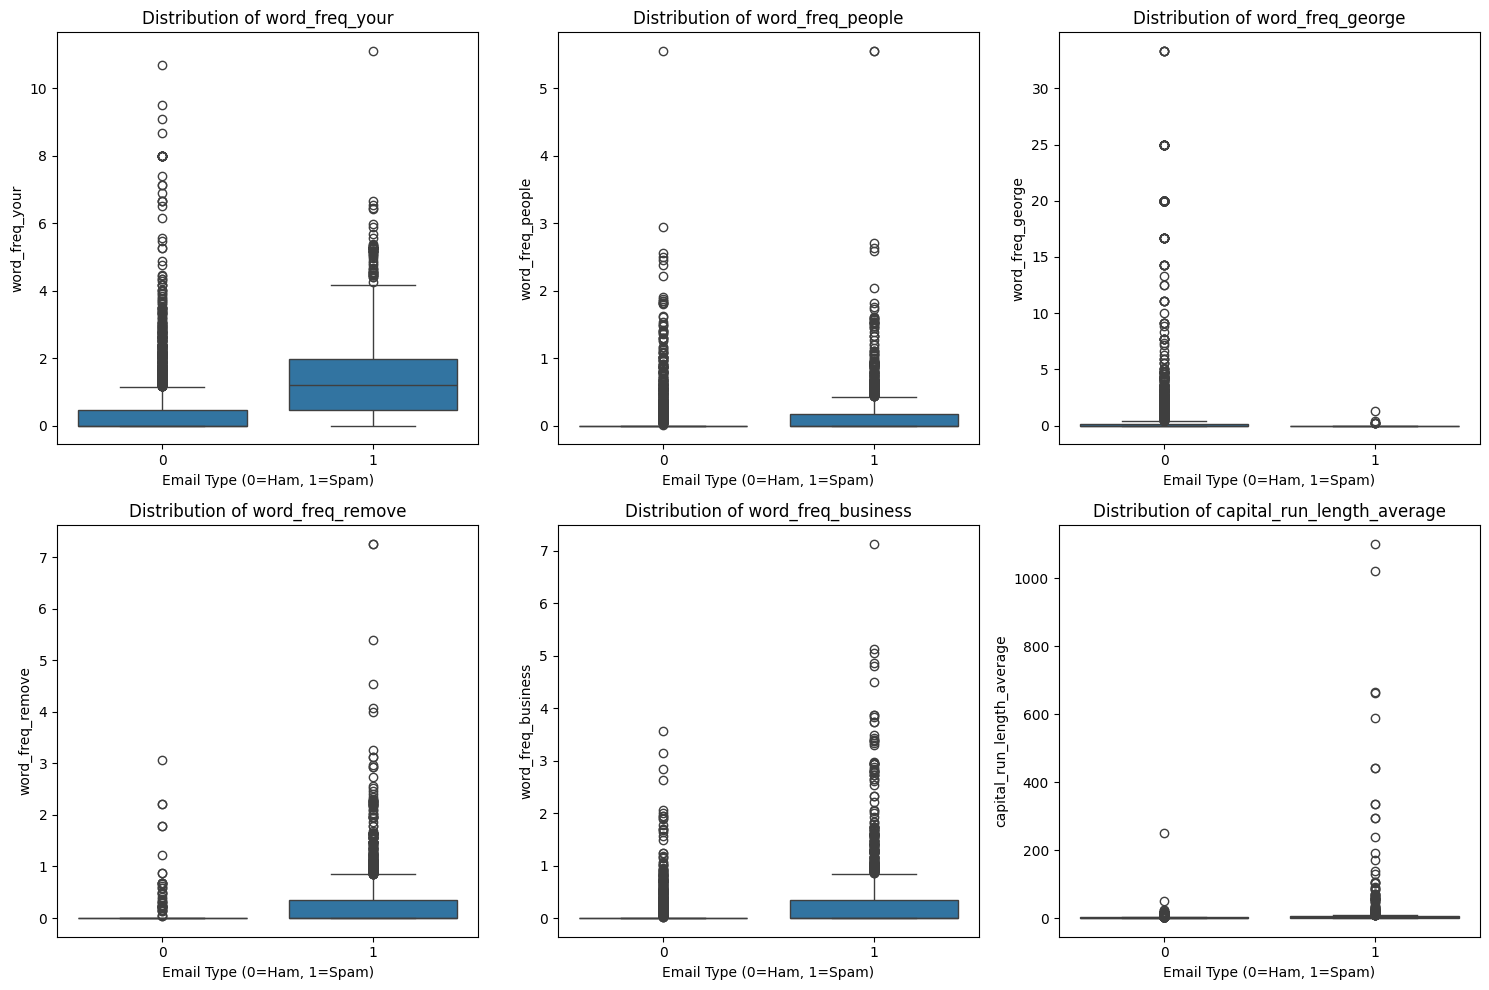

In [12]:
#Draw a group box plot of the distribution of the remaining variables and the dependent variable
selected_features = [
    'word_freq_your',       # Frequency of word "your"
    'word_freq_people',     # Frequency of word "people"
    'word_freq_george',     # Frequency of word "george" (non-spam indicator)
    'word_freq_remove',     # Frequency of word "remove"
    'word_freq_business',   # Frequency of word "business"
    'capital_run_length_average'  # Average length of capital sequences
]

# Create visualization
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i+1)

    # Handle column name with spaces
    y_col = 'capital_run_length_average' if feature == 'capital_run_length_average' else feature

    # Create boxplot
    sns.boxplot(x='Class', y=y_col, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Email Type (0=Ham, 1=Spam)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

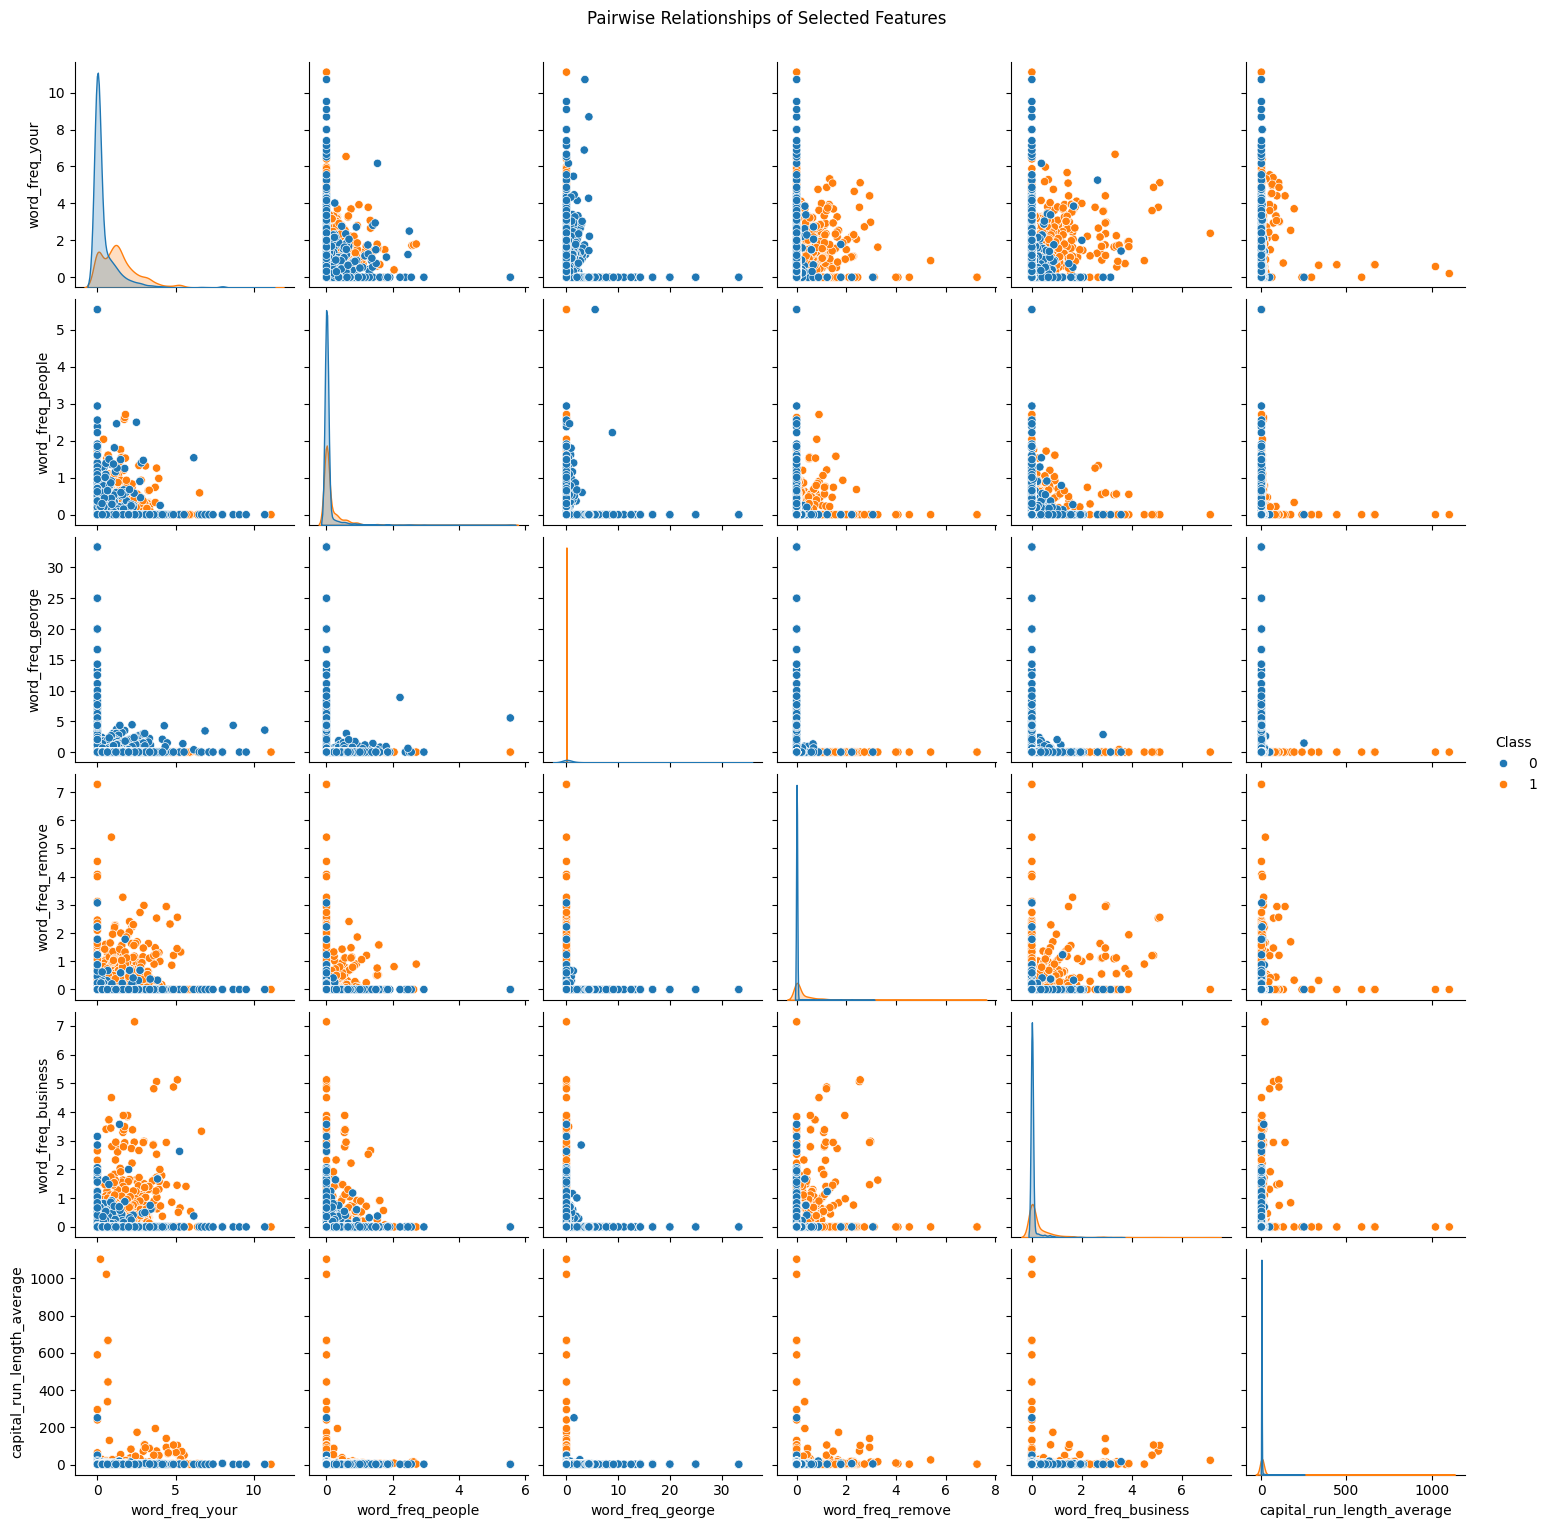

In [15]:
# Pairplot of selected features
sns.pairplot(df[selected_features + ['Class']], hue='Class', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Selected Features', y=1.02)
plt.show()

In [19]:
df_clear.to_csv("/content/sample_data/cleardata.csv")